In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.patches as mpatches
from datetime import datetime

In [11]:
mypath = r"Stats"
onlyfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]
print(onlyfiles)

['ekjlk_Profile5_22_10_04__01_35.csv', 'firstPrototype_profile0_22_08_23__17_24.csv', 'firstprototype_profile2_22_08_23__17_18.csv', 'icetest_Profile2_22_10_06__00_45.csv', 'icetest_Profile2_22_10_06__01_38.csv', 'icetest_Profile3_22_10_06__00_36.csv', 'icetest_Profile3_22_10_06__00_41.csv', 'icetest_Profile3_22_10_06__00_43.csv', 'icetest_Profile3_22_10_06__00_45.csv', 'icetest_Profile3_22_10_06__01_34.csv', 'icetest_Profile4_22_10_06__00_35.csv', 'icetest_Profile4_22_10_06__00_42.csv', 'icetest_Profile4_22_10_06__00_45.csv', 'icetest_Profile4_22_10_06__01_36.csv', 'icetest_Profile4_22_10_06__16_35.csv', 'icetest_Profile5_22_10_06__00_30.csv', 'icetest_Profile5_22_10_06__00_33.csv', 'icetest_Profile5_22_10_06__00_35.csv', 'icetest_Profile6_22_10_06__00_31.csv', 'icetest_Profile6_22_10_06__00_34.csv', 'Player1_Profile2_22_09_13__02_21.csv', 'Player1_Profile2_22_09_13__02_41.csv', 'Player1_Profile3_22_09_13__02_03.csv', 'Player1_Profile3_22_09_13__03_43.csv', 'Player1_Profile3_22_09_29_

In [3]:
df = pd.read_csv(os.path.join(mypath, onlyfiles[0]))

#preprocess gametime

t = np.array(df["Time"], )
t = t.astype(datetime)

t = np.array([datetime.strptime(my_date_string, '%Y-%m-%d %H:%M:%S.%f') for my_date_string in t])

start_time = t[0]
t = t - start_time

t = np.array([int(timesince.total_seconds()) for timesince in t]) 
df["GameTime"] = t
df

,Unnamed: 0,Player,Profile,Time,Event,GameTime
0,0,ekjlk,Profile5,2022-10-04 01:35:40.444879,LevelLoad,0
1,1,ekjlk,Profile5,2022-10-04 01:35:40.446878,killed an enemy,0
2,2,ekjlk,Profile5,2022-10-04 01:35:40.603727,hp 138,0
3,3,ekjlk,Profile5,2022-10-04 01:35:40.606728,armor 30,0
4,4,ekjlk,Profile5,2022-10-04 01:35:40.611729,hp 138,0
...,...,...,...,...,...,...
2994,2994,ekjlk,Profile5,2022-10-04 01:43:47.928435,hp 0,487
2995,2995,ekjlk,Profile5,2022-10-04 01:43:47.931436,armor 0,487
2996,2996,ekjlk,Profile5,2022-10-04 01:43:47.944438,hp 0,487
2997,2997,ekjlk,Profile5,2022-10-04 01:43:47.947439,armor 0,487


enemies killed 122


Text(0.5, 0, 'Time')

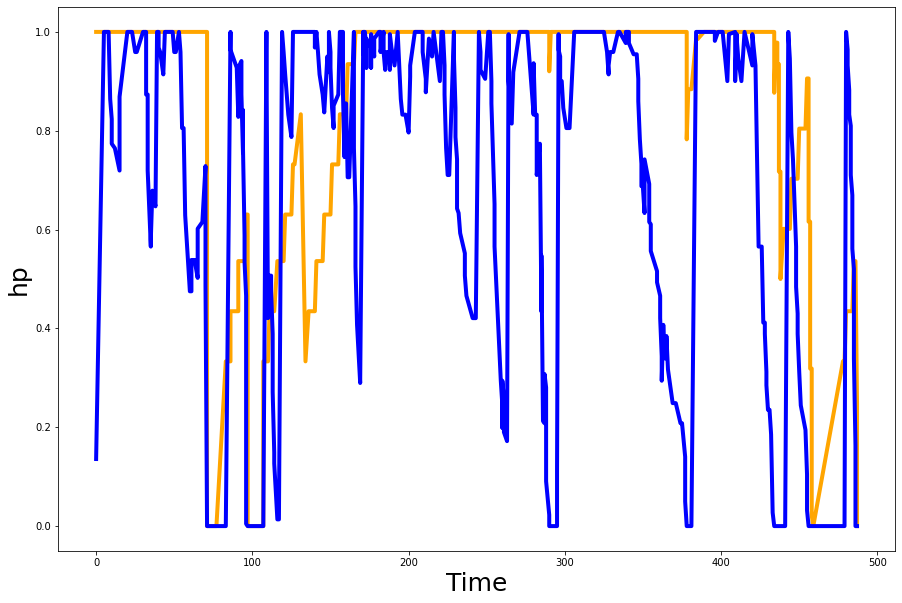

In [4]:
fig, ax=plt.subplots(figsize=(15,10))

#killed enemies
df_deaths_enemy = df.loc[df["Event"].str.contains("killed an enemy", case = False)]
#ax.scatter(df_deaths_enemy["GameTime"], np.arange(1,len(df_deaths_enemy["Time"])+1), label="Enemies killed", linewidth=2.0, color='black')


print(f"enemies killed", len(df_deaths_enemy["GameTime"]))

# player hp
df_hp = df.loc[df["Event"].str.contains("hp", case = False)]
hp = np.array([int(ev.replace("hp ","")) for ev in df_hp["Event"]])
hp_max = np.max(hp)
hp = hp/hp_max
ax.plot(df_hp["GameTime"], hp, label="hp", linewidth=4.0, color='orange')

# player armor
df_hp = df.loc[df["Event"].str.contains("armor", case = False)]
df_hp = df_hp.loc[~df_hp["Event"].str.contains("regenerate armor", case = False)]
armor = np.array([int(ev.replace("armor ","")) for ev in df_hp["Event"]])
armor_max = np.max(armor)
ax.plot(df_hp["GameTime"], armor/armor_max, label="armor", linewidth=4.0, color='blue')


#ax.plot(x,y, linewidth=10.0, color='black', label="Average", zorder=2)
ax.set_ylabel(f"hp", fontsize=25)
ax.set_xlabel(f"Time", fontsize=25)

In [5]:
events= ("enemy_hit", "enemy_headshot", "enemy_crit", "killed an enemy", "shielded hit", "unshielded hit", "auto regenerate armor", "downed")

for e in events:
    df_event = df.loc[df["Event"]==e]
    print(e, len(df_event))

enemy_hit 317
enemy_headshot 0
enemy_crit 0
killed an enemy 122
shielded hit 207
unshielded hit 30
auto regenerate armor 35
downed 5


In [10]:
events= ("revived by ally", "auto replenish health", "auto regenerate armor", "unshielded hit", "tased", "shielded hit")

for e in events:
    df_event = df.loc[df["Event"]==e]
    print(e, len(df_event))

revived by ally 4
auto replenish health 0
auto regenerate armor 35
unshielded hit 30
tased 2
shielded hit 207


In [13]:
#player take damage
df_deaths_enemy = df.loc[df["Event"]=="shielded hit"]
for t in df_deaths_enemy["GameTime"]:
    ax.axvline(x=t, color = "blue")
#ax.scatter(df_deaths_enemy["GameTime"], np.arange(1,len(df_deaths_enemy["Time"])+1), label="Enemies killed", linewidth=2.0, color='blue')

df_deaths_enemy = df.loc[df["Event"]=="unshielded hit"]
for t in df_deaths_enemy["GameTime"]:
    ax.axvline(x=t, color = "orange")
#ax.scatter(df_deaths_enemy["GameTime"], np.arange(1,len(df_deaths_enemy["Time"])+1), label="Enemies killed", linewidth=2.0, color='orange')

df_deaths_enemy = df.loc[df["Event"]=="auto regenerate armor"]
for t in df_deaths_enemy["GameTime"]:
    ax.axvline(x=t,color = "lightblue")
#ax.scatter(df_deaths_enemy["GameTime"], np.arange(1,len(df_deaths_enemy["Time"])+1), label="Enemies killed", linewidth=2.0, color='blue')

df_deaths_enemy = df.loc[df["Event"]=="revived by ally"]
for t in df_deaths_enemy["GameTime"]:
    ax.axvline(x=t,color = "lightblue")
#ax.scatter(df_deaths_enemy["GameTime"], np.arange(1,len(df_deaths_enemy["Time"])+1), label="Enemies killed", linewidth=2.0, color='lightblue')

df_deaths_enemy = df.loc[df["Event"]=="downed"]
for t in df_deaths_enemy["GameTime"]:
    ax.axvline(x=t, color = "black")
#ax.scatter(df_deaths_enemy["GameTime"], np.arange(1,len(df_deaths_enemy["Time"])+1), label="Enemies killed", linewidth=2.0, color='black')